#### **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Load the data
df = pd.read_csv('/content/qa_pairs_kimathi.csv')

In [ ]:
print(df.head())

                                            Question  \
0  What plea did Dedan Kimathi give in response t...   
1           Who presided over Dedan Kimathi’s trial?   
2  What was Count 1 against Kimathi and under whi...   
3  What reason did Kimathi give for possessing am...   
4  Who were the assessors selected for Kimathi’s ...   

                                              Answer       Source Type  \
0  Kimathi pleaded that he had the firearm becaus...  MacArthur (2017)   
1  Chief Justice Sir Kenneth Kennedy O’Connor pre...  MacArthur (2017)   
2  Count 1 was unlawful possession of a firearm u...  MacArthur (2017)   
3  He said, like the firearm, he had the ammuniti...  MacArthur (2017)   
4  Tumuti s/o Gakere, Nderitu s/o Muteru, and Kib...  MacArthur (2017)   

                      Source File       Section ID          Theme  
0  dedan_kimathi_on_trial_cleaned  section_066.txt  Kimathi Voice  
1  dedan_kimathi_on_trial_cleaned  section_066.txt          Legal  
2  dedan_kimat

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question     342 non-null    object
 1   Answer       342 non-null    object
 2   Source Type  342 non-null    object
 3   Source File  342 non-null    object
 4   Section ID   317 non-null    object
 5   Theme        317 non-null    object
dtypes: object(6)
memory usage: 16.2+ KB
None


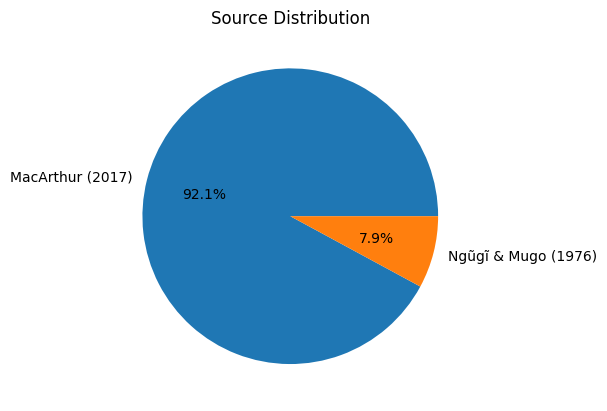

In [ ]:
# Source type distribution
df["Source Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Source Distribution")
plt.ylabel("")
plt.show()

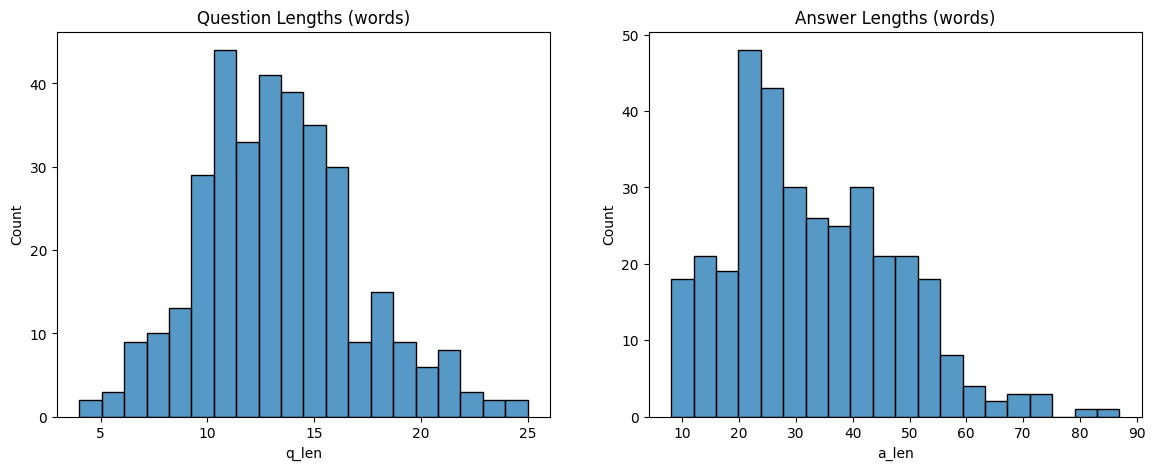

In [ ]:
# Question length
df["q_len"] = df["Question"].apply(lambda x: len(str(x).split()))
df["a_len"] = df["Answer"].apply(lambda x: len(str(x).split()))

# Histograms of lengths
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["q_len"], bins=20, ax=ax[0])
ax[0].set_title("Question Lengths (words)")
sns.histplot(df["a_len"], bins=20, ax=ax[1])
ax[1].set_title("Answer Lengths (words)")
plt.show()

In [ ]:
# Quick summary stats
print("Q length stats:")
print(df["q_len"].describe())
print("\nA length stats:")
print(df["a_len"].describe())

# Look at 95th percentile
print("95th percentile Q length:", df["q_len"].quantile(0.95))
print("95th percentile A length:", df["a_len"].quantile(0.95))


Q length stats:
count    342.000000
mean      13.403509
std        3.548704
min        4.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       25.000000
Name: q_len, dtype: float64

A length stats:
count    342.000000
mean      32.859649
std       14.851293
min        8.000000
25%       21.250000
50%       30.000000
75%       43.000000
max       87.000000
Name: a_len, dtype: float64
95th percentile Q length: 20.0
95th percentile A length: 57.94999999999999


In [ ]:
# Most common first words in questions
df["first_word"] = df["Question"].apply(lambda x: str(x).split()[0])
print(df["first_word"].value_counts().head(10))

first_word
What        181
How          76
Who          27
Why          15
Did           8
When          7
Was           6
Describe      6
Which         4
In            3
Name: count, dtype: int64


In [ ]:
# Most common first words in answers
df["first_word"] = df["Answer"].apply(lambda x: str(x).split()[0])
print(df["first_word"].value_counts().head(10))


first_word
The        110
He          55
Kimathi     36
They        12
His         11
A            7
Dr.          6
She          5
Dedan        5
Yes.         5
Name: count, dtype: int64


### **Preprocessing**

In [ ]:
def clean_text(text):
    # Normalize whitespace
    text = text.strip()
    text = re.sub(r"\s+", " ", text)

    # Normalize em-dashes and quotes
    text = text.replace("—", "-")
    text = text.replace("“", '"').replace("”", '"').replace("’", "'")

    # Remove odd characters (just in case)
    text = re.sub(r"[^\x00-\x7F]+", "", text)

    # Normalize ellipses
    text = re.sub(r"\.\.+", "...", text)

    return text


In [ ]:
df["Question"] = df["Question"].apply(clean_text)
df["Answer"] = df["Answer"].apply(clean_text)

df["input_text"] = "question: " + df["Question"]
df["target_text"] = df["Answer"]

In [ ]:
# Save for model training
df[["input_text", "target_text"]].to_csv("kimathi_qa_text2text.csv", index=False)
print("Preprocessing complete and saved to kimathi_qa_text2text.csv")

Preprocessing complete and saved to kimathi_qa_text2text.csv


In [ ]:
qa_df=pd.read_csv('/content/kimathi_qa_text2text.csv')
qa_df.head()

,input_text,target_text
0,question: What plea did Dedan Kimathi give in ...,Kimathi pleaded that he had the firearm becaus...
1,question: Who presided over Dedan Kimathi's tr...,Chief Justice Sir Kenneth Kennedy O'Connor pre...
2,question: What was Count 1 against Kimathi and...,Count 1 was unlawful possession of a firearm u...
3,question: What reason did Kimathi give for pos...,"He said, like the firearm, he had the ammuniti..."
4,question: Who were the assessors selected for ...,"Tumuti s/o Gakere, Nderitu s/o Muteru, and Kib..."
